# <b>DSAI 3201 Machine Learning Project<b>

## Data Understanding and Preprocessing

## <b>1. Dataset Exploration<b> 

Examine the structure and features of the
UCI Indoor Localization WiFi Dataset (520 RSSI features, along
with building, floor, and coordinate information).

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import torch 
import torch.nn as nn 
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error,mean_absolute_error                   


In [3]:
# Display the dataset's structure and basic information
print("\nTrain Dataset Info:")
train_df.info()

print("\nTest Dataset Info:")
test_df.info()



Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 4.5 MB


In [4]:
last_9_columns = train_df.iloc[:, -9:]

# Apply the describe function on the last 9 columns
print(last_9_columns.describe())

# Show summary statistics of the dataset
print("\n-------Train Summary Statistics-------")
print(train_df.describe())
print("\n-------Test Summary Statistics-------")
print(test_df.describe())



          LONGITUDE      LATITUDE         FLOOR    BUILDINGID       SPACEID  \
count  19937.000000  1.993700e+04  19937.000000  19937.000000  19937.000000   
mean   -7464.275947  4.864871e+06      1.674575      1.212820    148.429954   
std      123.402010  6.693318e+01      1.223078      0.833139     58.342106   
min    -7691.338400  4.864746e+06      0.000000      0.000000      1.000000   
25%    -7594.737000  4.864821e+06      1.000000      0.000000    110.000000   
50%    -7423.060900  4.864852e+06      2.000000      1.000000    129.000000   
75%    -7359.193000  4.864930e+06      3.000000      2.000000    207.000000   
max    -7300.818990  4.865017e+06      4.000000      2.000000    254.000000   

       RELATIVEPOSITION        USERID       PHONEID     TIMESTAMP  
count      19937.000000  19937.000000  19937.000000  1.993700e+04  
mean           1.833024      9.068014     13.021869  1.371421e+09  
std            0.372964      4.988720      5.362410  5.572054e+05  
min            1

In [5]:
#drop unnecessary columns in both training and testing datasets  
dropped_columns = ["SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"]

train_df = train_df.drop(columns= dropped_columns)
test_df = test_df.drop(columns=dropped_columns)



In [6]:
# Check the column names to understand the features
print("\nColumns in Train Dataset:")
print(train_df.columns)
print("\nColumns in Test Dataset:")
print(test_df.columns)



Columns in Train Dataset:
Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP515', 'WAP516', 'WAP517', 'WAP518', 'WAP519', 'WAP520', 'LONGITUDE',
       'LATITUDE', 'FLOOR', 'BUILDINGID'],
      dtype='object', length=524)

Columns in Test Dataset:
Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP515', 'WAP516', 'WAP517', 'WAP518', 'WAP519', 'WAP520', 'LONGITUDE',
       'LATITUDE', 'FLOOR', 'BUILDINGID'],
      dtype='object', length=524)


## <b>2. Data Cleaning and Preparation:<b>

- Handle any missing values and normalize the RSSI
measurements

In [6]:
# checking data types
# print(train_df.dtypes)

# Check for missing values
print("\n-------Train Missing Values-------")
print(train_df.isnull().sum())

print("\n-------Test Missing Values-------")
print(test_df.isnull().sum())

# Filling missing values with the mean
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)



-------Train Missing Values-------
WAP001        0
WAP002        0
WAP003        0
WAP004        0
WAP005        0
             ..
WAP520        0
LONGITUDE     0
LATITUDE      0
FLOOR         0
BUILDINGID    0
Length: 524, dtype: int64

-------Test Missing Values-------
WAP001        0
WAP002        0
WAP003        0
WAP004        0
WAP005        0
             ..
WAP520        0
LONGITUDE     0
LATITUDE      0
FLOOR         0
BUILDINGID    0
Length: 524, dtype: int64


there are no missing values in this dataset, so we move on to checking the validity of all access points:


In [7]:

#access points with unique value being only 100 = the access point is not detected

print ("checking if all access points are detected (training data)")
count= 0
break_point = 0

for i in train_df:
    print(f"{i} unique values: {train_df[i].unique()}\n\n ")
    if train_df[i].unique().shape == (1,):
        count += 1
    break_point += 1
    if break_point >= 10:
        break
    
print(f"{count}  access points are undetected")

        

checking if all access points are detected (training data)
WAP001 unique values: [100 -97 -95 -96 -94 -93]

 
WAP002 unique values: [100 -90 -86]

 
WAP003 unique values: [100]

 
WAP004 unique values: [100]

 
WAP005 unique values: [100 -92 -96 -97 -95 -93 -90 -89 -91 -94]

 
WAP006 unique values: [100 -94 -90 -89 -79 -87 -68 -71 -67 -81 -95 -93 -83 -78 -85 -86 -91 -92
 -62 -65 -80 -82 -96 -70 -88 -72 -84 -58 -76 -66 -60 -77 -74 -61 -98 -97]

 
WAP007 unique values: [100 -84 -80 -82 -93 -75 -86 -88 -69 -73 -74 -67 -60 -62 -54 -72 -76 -61
 -65 -49 -83 -92 -71 -78 -81 -77 -79 -90 -85 -95 -94 -89 -96 -97 -87 -68
 -56 -59 -55 -98 -91 -63 -51 -57 -58 -53 -70 -66 -48 -99 -47 -64]

 
WAP008 unique values: [100 -97 -83 -90 -95 -84 -98 -91 -80 -92 -86 -81 -94 -88 -85 -96 -87 -89
 -72 -79 -82 -65 -66 -69 -77 -73 -70 -78 -68 -93 -71 -67 -74 -63 -62 -75
 -76 -61 -64]

 
WAP009 unique values: [100 -70 -83 -86 -68 -85 -73 -66 -62 -94 -87 -98 -88 -76 -71 -77 -63 -74
 -79 -93 -96 -90 -69 -56 -67 -82 

In [9]:

print ("checking if all access points are detected (testing data)")
count= 0
break_point = 0

for i in test_df:
    print(f"{i} unique values: {test_df[i].unique()}\n\n ")
    if test_df[i].unique().shape == (1,):
        count += 1
    break_point += 1
    if break_point >= 10:
        break
    
print(f"{count}  access points are undetected")



        

checking if all access points are detected (testing data)
WAP001 unique values: [100 -94 -93 -92 -85]

 
WAP002 unique values: [100]

 
WAP003 unique values: [100 -85 -87]

 
WAP004 unique values: [100 -84 -88]

 
WAP005 unique values: [100]

 
WAP006 unique values: [100]

 
WAP007 unique values: [100]

 
WAP008 unique values: [100 -99 -92 -94 -95 -87 -85 -88 -79 -83 -62 -64 -90 -89 -91 -81 -82 -75]

 
WAP009 unique values: [100 -79 -84 -61 -75 -96 -87 -78 -93 -67 -89 -95 -88 -92 -81 -94 -69 -82
 -71 -80 -70 -62 -85 -73 -83 -59 -76]

 
WAP010 unique values: [100 -88 -98 -84 -90]

 
4  access points are undetected


- Scale features appropriately and encode any categorical
variables if needed (we decided to use normalization for this)

In [10]:
# normalizing x which is in the range [xmin, xmax] to a range [a,b]

def normalize(x, xmin, xmax, a, b):
    numerator = x - xmin
    denominator = xmax - xmin
    multiplier = b - a
    ans = (numerator/denominator)*multiplier + a
    return ans

In [11]:
no_sig = 100

#Normalization for RSSI values
sig_min = -104 
sig_max = 0
tar_min = 0.25
tar_max = 1.0

def normalize_wifi(num):
    ans = 0
    num = float(num)
    if math.isclose(num, no_sig, rel_tol=1e-3):  #If the RSSI value = no_signal ==> the value after normalized is 0
        return 0
    else:
        ans = normalize(num, sig_min, sig_max, tar_min, tar_max)
        return ans
    
#Normalization for Latitude  
lat_min = 4864745
lat_max = 4865016
tarmin = 0
tarmax = 1
def normalize_lat(num):
    num = float(num)
    ans = normalize(num, lat_min, lat_max, tarmin, tarmax)
    return ans

#Normalization for Longtitude
long_min = -7691.338 
long_max = -7300.819
tarmin = 0
tarmax = 1
def normalize_long(num):
    num = float(num)
    ans = normalize(num, long_min, long_max, tarmin, tarmax)
    return ans


In [12]:


# apply normalization for latitude and longitude in testing and training data
train_df["LATITUDE"] = train_df["LATITUDE"].apply(normalize_lat)
train_df["LONGITUDE"] = train_df["LONGITUDE"].apply(normalize_long)

test_df["LATITUDE"] = test_df["LATITUDE"].apply(normalize_lat)
test_df["LONGITUDE"] = test_df["LONGITUDE"].apply(normalize_long)


# Normalize RSSI values 
wifi_cells_ta=train_df.columns[:520] # 520 wifi signals, index started at 1
wifi_cells_te=test_df.columns[:520]

for i in wifi_cells_ta:
    train_df[i] = train_df[i].apply(normalize_wifi)
    
for i in wifi_cells_te:
    test_df[i] = test_df[i].apply(normalize_wifi)
    
train_df


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID
0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.384293,0.648628,2,1
1,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.396183,0.698248,2,1
2,0.0,0.0,0,0,0.0,0.0,0.0,0.300481,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.440915,0.754731,2,1
3,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.427041,0.697760,2,1
4,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.151579,0.875340,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.527169,0.478658,3,1
19933,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.770046,0.335999,1,2
19934,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.446832,0.532439,3,1
19935,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.394388,0.556368,3,1



## Visualization ##

In [13]:
#merge both dfs for visualization purposes only 
df = pd.concat([test_df, train_df], axis=0)
df= df.fillna(0)
df

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.449200,0.533812,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.787339,0.349595,4,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.811832,0.374663,4,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.833540,0.360994,4,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.127622,0.654610,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.527169,0.478658,3,1
19933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.770046,0.335999,1,2
19934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.446832,0.532439,3,1
19935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.394388,0.556368,3,1


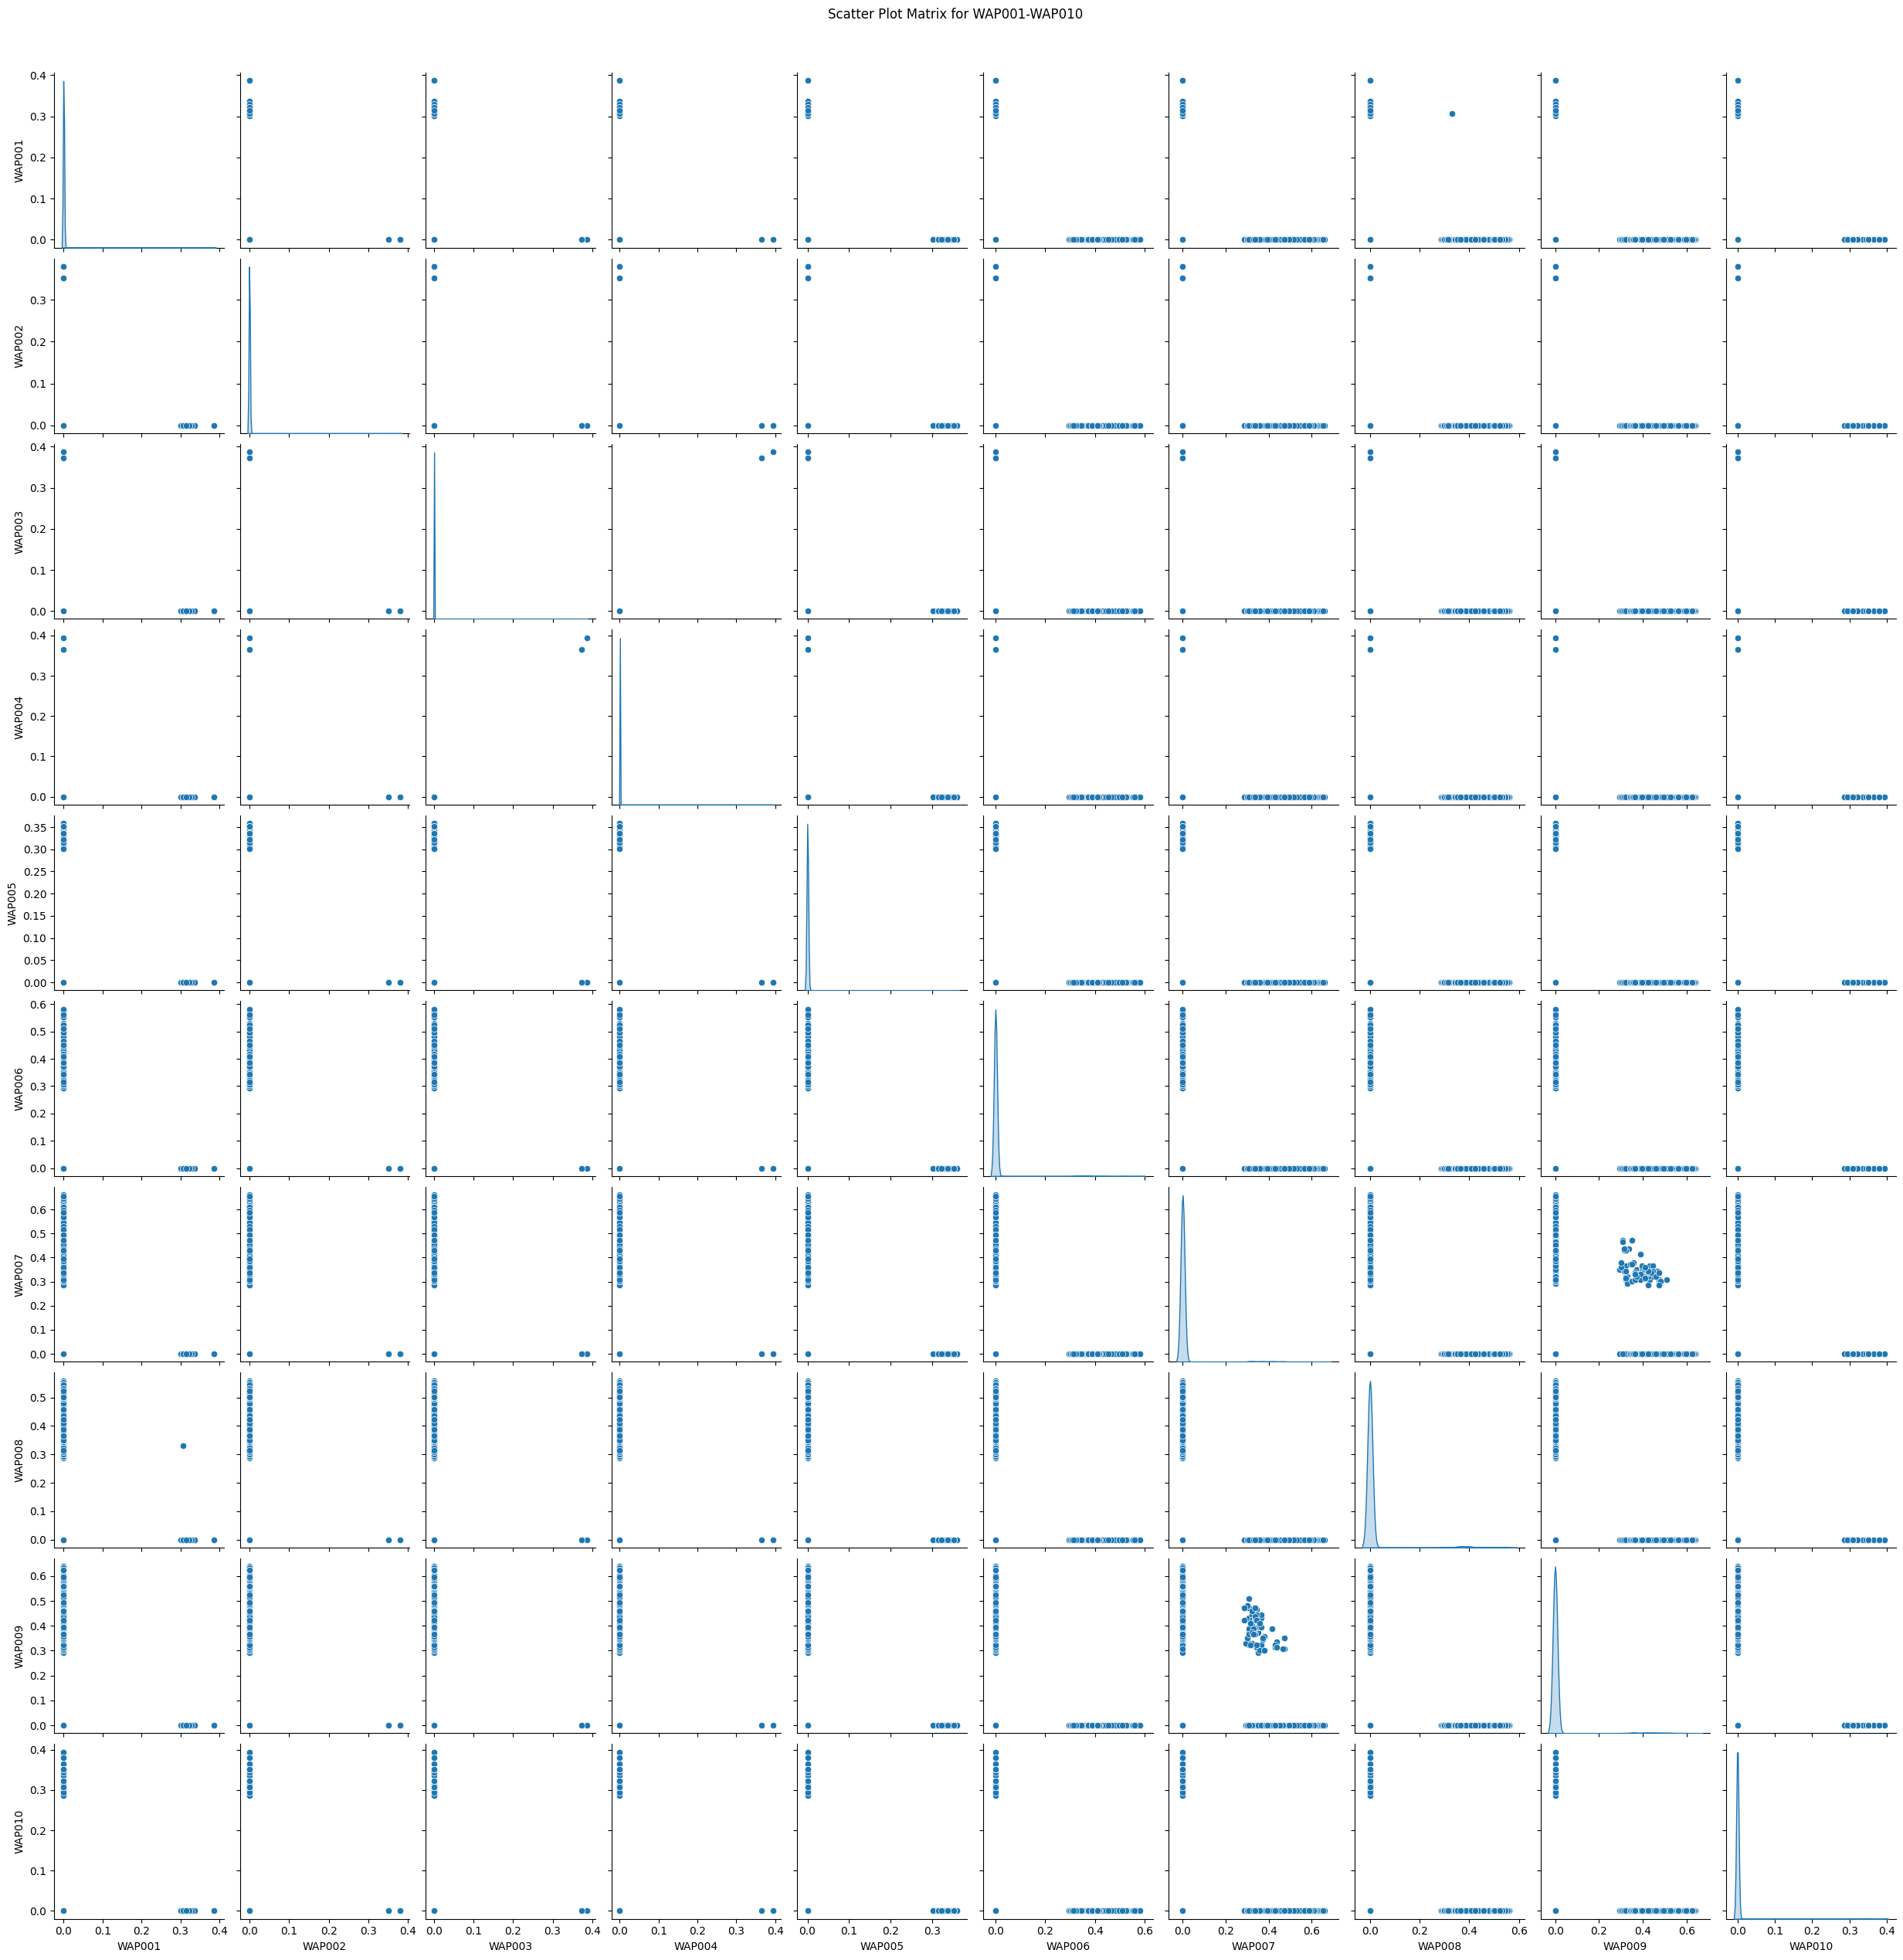

In [14]:
sns.pairplot(df.iloc[:, :10], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix for WAP001-WAP010', y=1.02)
plt.show()

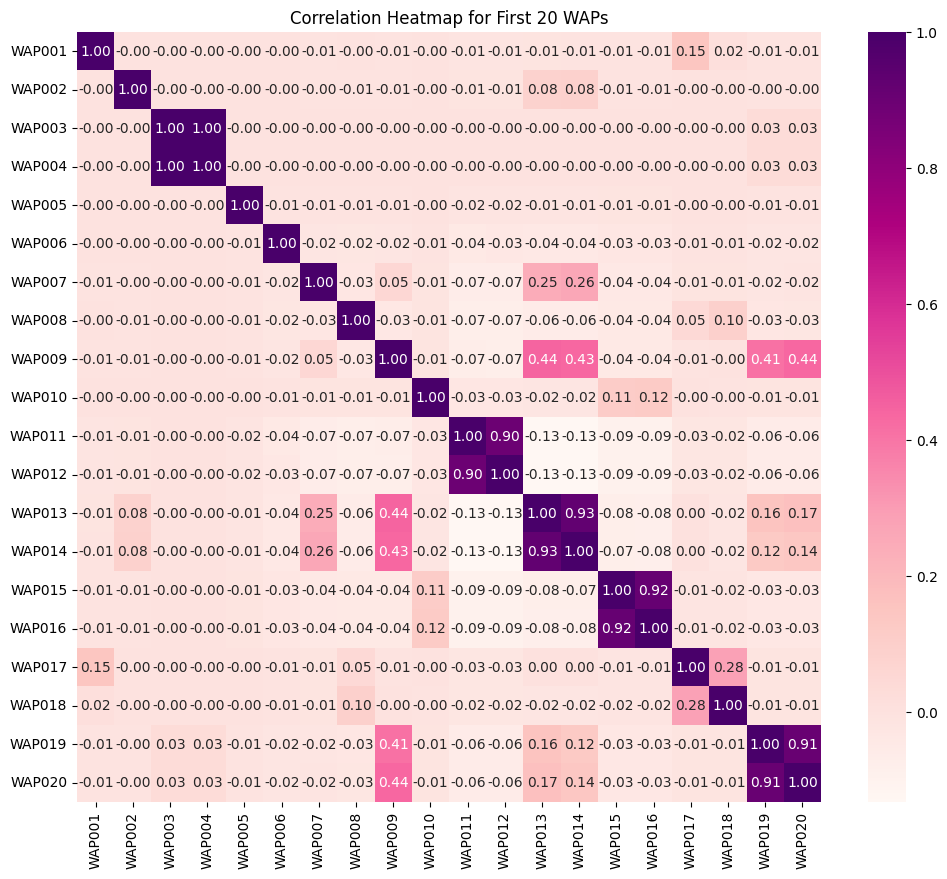

In [15]:
wap_subset = df.iloc[:, :20]  # First 20 WAPs
plt.figure(figsize=(12, 10))
sns.heatmap(wap_subset.corr(), cmap='RdPu', annot=True, fmt='.2f')
plt.title('Correlation Heatmap for First 20 WAPs')
plt.show()

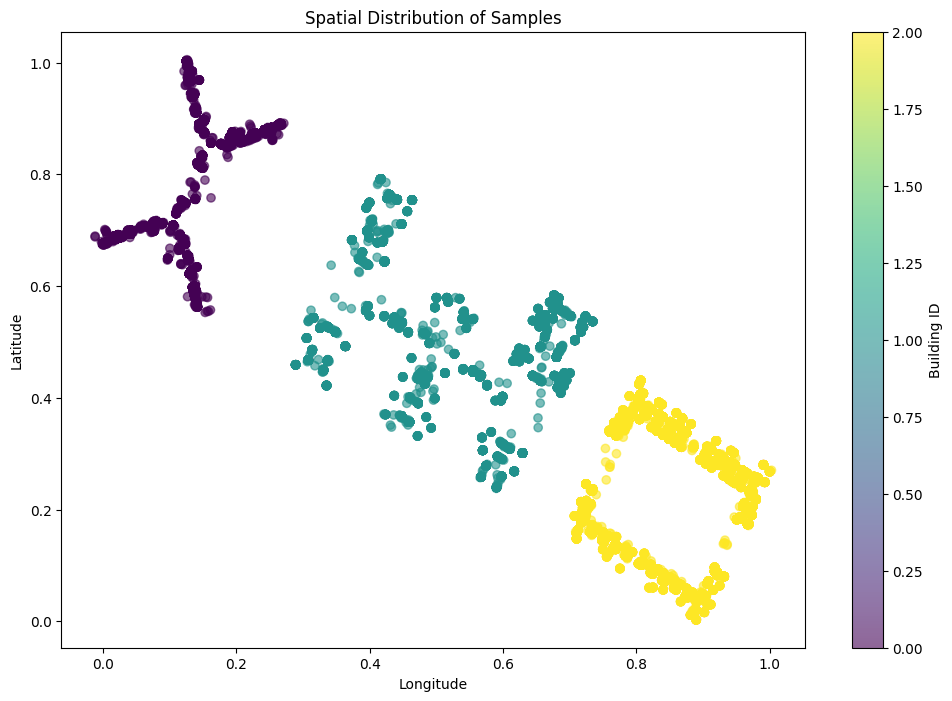

In [16]:
# Scatter plot of LONGITUDE vs LATITUDE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['BUILDINGID'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Building ID')
plt.title('Spatial Distribution of Samples')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

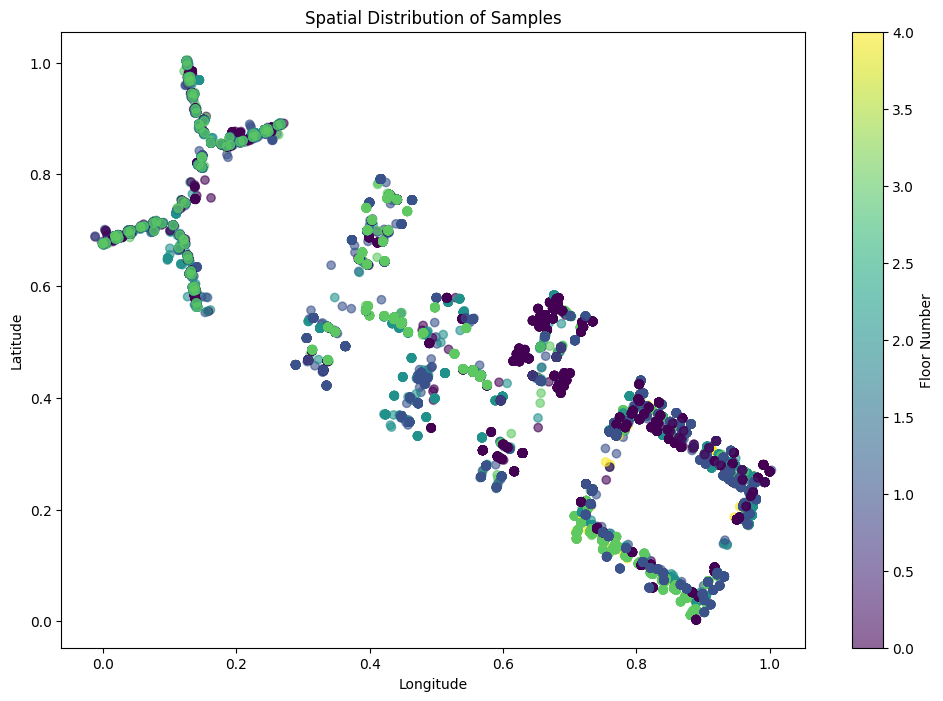

In [17]:
# Scatter plot of LONGITUDE vs LATITUDE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['FLOOR'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Floor Number')
plt.title('Spatial Distribution of Samples')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

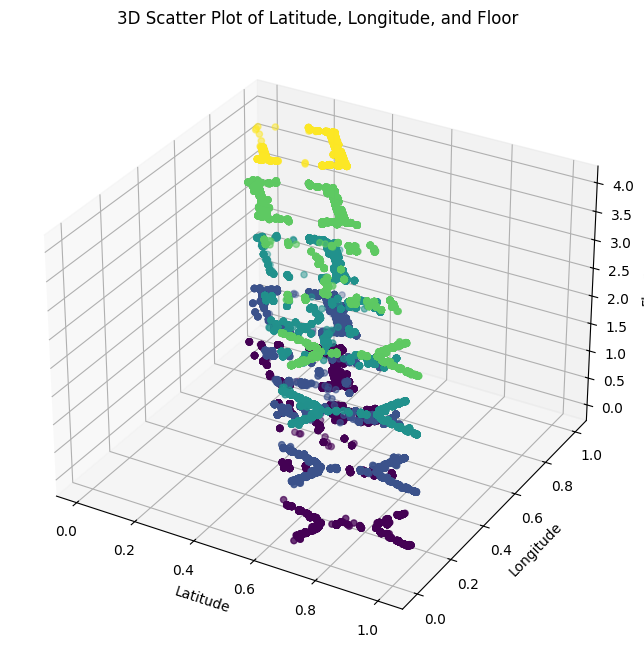

In [18]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LATITUDE'], df['LONGITUDE'], df['FLOOR'], c=df['FLOOR'], cmap='viridis')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Floor')
plt.title('3D Scatter Plot of Latitude, Longitude, and Floor')
plt.show()

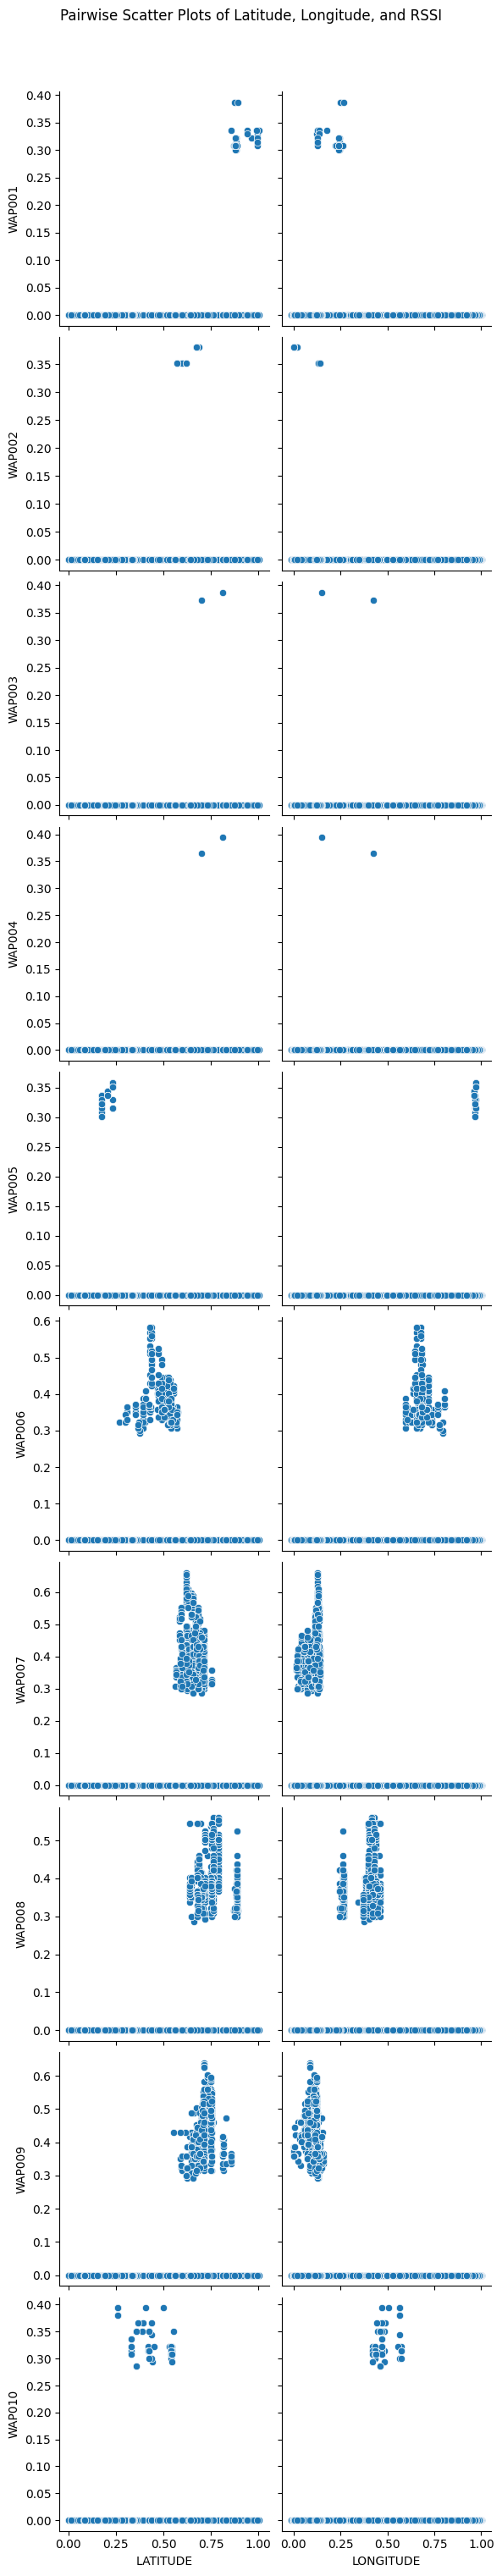

In [19]:
import seaborn as sns
import pandas as pd


# Create pairwise scatter plots
sns.pairplot(df, x_vars=['LATITUDE', 'LONGITUDE'], y_vars=df.iloc[:, :10], height=3)
plt.suptitle('Pairwise Scatter Plots of Latitude, Longitude, and RSSI', y=1.02)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17272\480868197.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['DISTANCE'] = np.sqrt((df['LATITUDE'] - access_point[0])**2 + (df['LONGITUDE'] - access_point[1])**2)


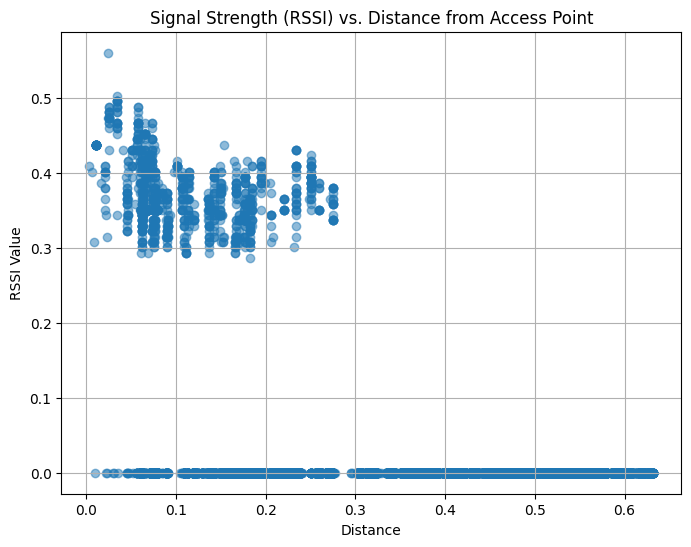

In [20]:
# Calculate distance from a hypothetical access point at (0.5, 0.5)
access_point = (0.5, 0.5)  # Hypothetical access point coordinates
df['DISTANCE'] = np.sqrt((df['LATITUDE'] - access_point[0])**2 + (df['LONGITUDE'] - access_point[1])**2)

# Plot RSSI vs. Distance
plt.figure(figsize=(8, 6))
plt.scatter(df['DISTANCE'], df['WAP016'], alpha=0.5)  
plt.ylabel('RSSI Value')
plt.xlabel('Distance')
plt.title('Signal Strength (RSSI) vs. Distance from Access Point')
plt.grid(True)
plt.show()

## Model implenemtation ##

**1) Basic classifiction model:**



*Logistic Regression*

In [21]:
# Calculate distance from a hypothetical access point at (0.5, 0.5) in the train df
access_point = (0.5, 0.5)  # Hypothetical access point coordinates
train_df['DISTANCE'] = np.sqrt((train_df['LATITUDE'] - access_point[0])**2 + (train_df['LONGITUDE'] - access_point[1])**2)
train_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17272\3422876153.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['DISTANCE'] = np.sqrt((train_df['LATITUDE'] - access_point[0])**2 + (train_df['LONGITUDE'] - access_point[1])**2)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,DISTANCE
0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.384293,0.648628,2,1,0.188357
1,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.396183,0.698248,2,1,0.223786
2,0.0,0.0,0,0,0.0,0.0,0.0,0.300481,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.440915,0.754731,2,1,0.261494
3,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.427041,0.697760,2,1,0.210789
4,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.151579,0.875340,0,0,0.512130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.527169,0.478658,3,1,0.034549
19933,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.770046,0.335999,1,2,0.315944
19934,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.446832,0.532439,3,1,0.062282
19935,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.394388,0.556368,3,1,0.119713


In [22]:
# Calculate distance from a hypothetical access point at (0.5, 0.5) in the test df
access_point = (0.5, 0.5)  # Hypothetical access point coordinates
test_df['DISTANCE'] = np.sqrt((test_df['LATITUDE'] - access_point[0])**2 + (test_df['LONGITUDE'] - access_point[1])**2)
test_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17272\2877516411.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df['DISTANCE'] = np.sqrt((test_df['LATITUDE'] - access_point[0])**2 + (test_df['LONGITUDE'] - access_point[1])**2)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,DISTANCE
0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.449200,0.533812,1,1,0.061023
1,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.787339,0.349595,4,2,0.324323
2,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.811832,0.374663,4,2,0.336078
3,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.833540,0.360994,4,2,0.361347
4,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.127622,0.654610,2,0,0.403199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.957684,0.186458,3,2,0.554782
1107,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.966936,0.173666,3,2,0.569669
1108,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.137771,0.583872,0,0,0.371812
1109,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.140029,0.590169,0,0,0.371092


In [23]:
# Define features (WiFi signal strengths)
X_train = train_df.iloc[:, :-5] 
X_test = test_df.iloc[:, :-5]

# Define target variable (FLOOR)
y_train = train_df["FLOOR"]  
y_test = test_df["FLOOR"]

# Train Logistic Regression
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.8766876687668766
Confusion Matrix:
 [[121   9   2   0   0]
 [ 33 393  34   2   0]
 [  4  10 275  16   1]
 [  0   0  12 158   2]
 [  1   0   0  11  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       132
           1       0.95      0.85      0.90       462
           2       0.85      0.90      0.87       306
           3       0.84      0.92      0.88       172
           4       0.90      0.69      0.78        39

    accuracy                           0.88      1111
   macro avg       0.86      0.86      0.85      1111
weighted avg       0.88      0.88      0.88      1111



In [24]:
# Define features (WiFi signal strengths)
X_train = train_df.iloc[:, :-5] 
X_test = test_df.iloc[:, :-5]

# Define target variable (BUILDINGID)
y_train = train_df["BUILDINGID"]  
y_test = test_df["BUILDINGID"]

# Train Logistic Regression
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9990999099909991
Confusion Matrix:
 [[535   1   0]
 [  0 307   0]
 [  0   0 268]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       307
           2       1.00      1.00      1.00       268

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111



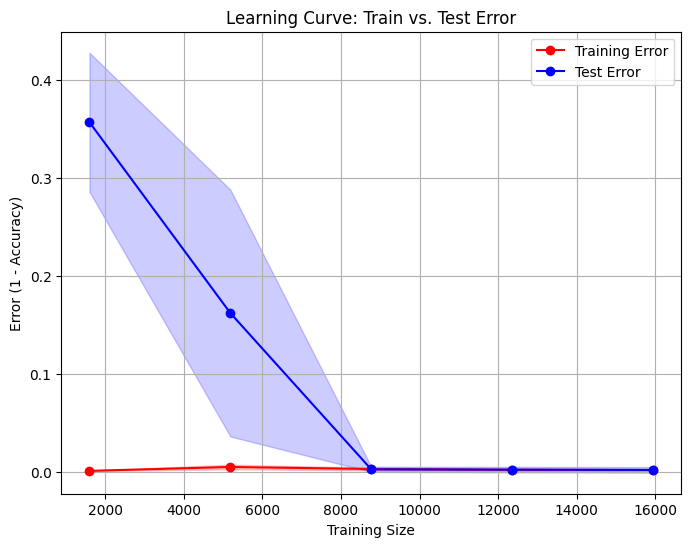

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define a function to plot learning curves
def plot_learning_curve(model, X_train, y_train):
    train_sizes = np.linspace(0.1, 1.0, 10)  # Vary training sizes from 10% to 100%
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)

    # Compute mean and std deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, 1 - train_mean, "o-", color="red", label="Training Error")  # 1 - accuracy = error
    plt.fill_between(train_sizes, 1 - (train_mean - train_std), 1 - (train_mean + train_std), alpha=0.2, color="red")

    plt.plot(train_sizes, 1 - test_mean, "o-", color="blue", label="Test Error")
    plt.fill_between(train_sizes, 1 - (test_mean - test_std), 1 - (test_mean + test_std), alpha=0.2, color="blue")

    plt.xlabel("Training Size")
    plt.ylabel("Error (1 - Accuracy)")
    plt.title("Learning Curve: Train vs. Test Error")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(log_reg, X_train, y_train)


**2) Advanced Regression model:**



*PyTorch Neural Network Regression*

In [26]:
# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [27]:
drop_cols = ['FLOOR', 'BUILDINGID', 'LATITUDE', 'LONGITUDE', 'DISTANCE']

X_train = train_df.drop(columns=drop_cols)
y_train = train_df[['LATITUDE', 'LONGITUDE']]

X_val = test_df.drop(columns=drop_cols)
y_val = test_df[['LATITUDE', 'LONGITUDE']]

In [28]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [29]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)


In [30]:
# Create DataLoaders
batch_size = 128
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [31]:
# Neural Network Definition
class WifiRegressor(nn.Module):
    def __init__(self, input_size):
        super(WifiRegressor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # Latitude and Longitude
        )

    def forward(self, x):
        return self.net(x)

model = WifiRegressor(X_train_tensor.shape[1]).to(device)


In [32]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 50
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/50 - Loss: 0.0197
Epoch 2/50 - Loss: 0.0051
Epoch 3/50 - Loss: 0.0038
Epoch 4/50 - Loss: 0.0030
Epoch 5/50 - Loss: 0.0024
Epoch 6/50 - Loss: 0.0021
Epoch 7/50 - Loss: 0.0018
Epoch 8/50 - Loss: 0.0016
Epoch 9/50 - Loss: 0.0014
Epoch 10/50 - Loss: 0.0013
Epoch 11/50 - Loss: 0.0013
Epoch 12/50 - Loss: 0.0011
Epoch 13/50 - Loss: 0.0011
Epoch 14/50 - Loss: 0.0010
Epoch 15/50 - Loss: 0.0010
Epoch 16/50 - Loss: 0.0010
Epoch 17/50 - Loss: 0.0010
Epoch 18/50 - Loss: 0.0009
Epoch 19/50 - Loss: 0.0009
Epoch 20/50 - Loss: 0.0009
Epoch 21/50 - Loss: 0.0009
Epoch 22/50 - Loss: 0.0009
Epoch 23/50 - Loss: 0.0008
Epoch 24/50 - Loss: 0.0008
Epoch 25/50 - Loss: 0.0008
Epoch 26/50 - Loss: 0.0008
Epoch 27/50 - Loss: 0.0009
Epoch 28/50 - Loss: 0.0008
Epoch 29/50 - Loss: 0.0009
Epoch 30/50 - Loss: 0.0008
Epoch 31/50 - Loss: 0.0008
Epoch 32/50 - Loss: 0.0007
Epoch 33/50 - Loss: 0.0007
Epoch 34/50 - Loss: 0.0007
Epoch 35/50 - Loss: 0.0007
Epoch 36/50 - Loss: 0.0007
Epoch 37/50 - Loss: 0.0007
Epoch 38/5

In [33]:
model.eval()
with torch.no_grad():
    preds = model(X_val_tensor.to(device)).cpu().numpy()

lat_mae = mean_absolute_error(y_val['LATITUDE'], preds[:, 0])
long_mae = mean_absolute_error(y_val['LONGITUDE'], preds[:, 1])
lat_rmse = np.sqrt(mean_squared_error(y_val['LATITUDE'], preds[:, 0]))
long_rmse = np.sqrt(mean_squared_error(y_val['LONGITUDE'], preds[:, 1]))

print(f"Latitude MAE: {lat_mae:.2f}, RMSE: {lat_rmse:.2f}")
print(f"Longitude MAE: {long_mae:.2f}, RMSE: {long_rmse:.2f}")


Latitude MAE: 0.03, RMSE: 0.05
Longitude MAE: 0.02, RMSE: 0.04


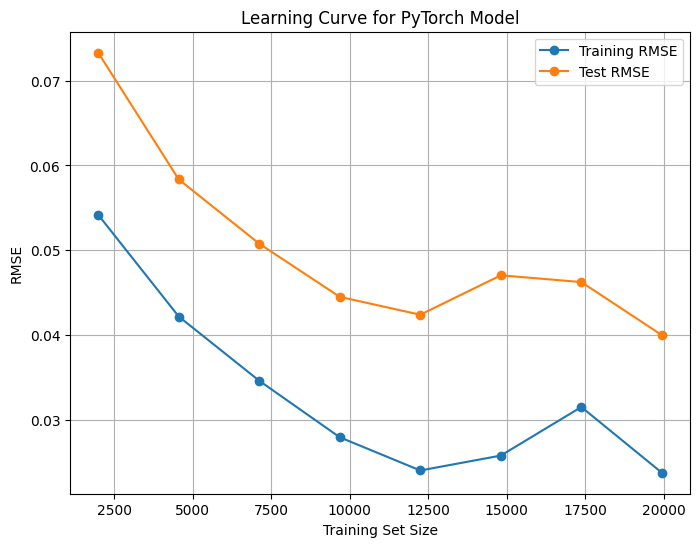

In [34]:
def plot_pytorch_learning_curve(model_class, X_train, y_train, X_val, y_val, device, batch_size=128, epochs=30):
    import copy
    train_sizes = np.linspace(0.1, 1.0, 8)
    train_errors, val_errors = [], []

    for frac in train_sizes:
        # Create new model instance for each run
        model = model_class(X_train.shape[1]).to(device)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        # Subsample the training data
        n_samples = int(frac * len(X_train))
        idx = np.random.choice(len(X_train), n_samples, replace=False)
        X_sub = X_train[idx]
        y_sub = y_train[idx]

        train_loader = DataLoader(TensorDataset(X_sub, y_sub), batch_size=batch_size, shuffle=True)

        # Train the model
        model.train()
        for epoch in range(epochs):
            for xb, yb in train_loader:
                xb, yb = xb.to(device), yb.to(device)
                optimizer.zero_grad()
                pred = model(xb)
                loss = criterion(pred, yb)
                loss.backward()
                optimizer.step()

        # Evaluate on train & val
        model.eval()
        with torch.no_grad():
            train_pred = model(X_sub.to(device)).cpu().numpy()
            val_pred = model(X_val.to(device)).cpu().numpy()

            train_rmse = np.sqrt(mean_squared_error(y_sub.numpy(), train_pred))
            val_rmse = np.sqrt(mean_squared_error(y_val.numpy(), val_pred))

            train_errors.append(train_rmse)
            val_errors.append(val_rmse)

    # Plot the curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes * len(X_train), train_errors, label="Training RMSE", marker='o')
    plt.plot(train_sizes * len(X_train), val_errors, label="Test RMSE", marker='o')
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.title("Learning Curve for PyTorch Model")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pytorch_learning_curve(WifiRegressor, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, device)


**3) Advanced Classification model (Random Forest Classifier)**

3.1. Importing model and necessary libraries and splitting the dataset

In [23]:
# Import required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score,f1_score 


# Selecting features and targets

# Features (Wi-Fi signal strengths) 
X_train = train_df.iloc[:, :-5] 
X_test = test_df.iloc[:, :-5] 

# Defining target variables
y_building_train = train_df["BUILDINGID"]
y_building_test = test_df["BUILDINGID"]
y_floor_train = train_df["FLOOR"]
y_floor_test = test_df["FLOOR"]


3.2. Implementing and training the advanced classification model to predict the building and floor

In [24]:
# Implementing the RandomForestClassifier model 

# Predicting the building and floor
building_clf = RandomForestClassifier(random_state=42)
# Predicting the floor
floor_clf = RandomForestClassifier(random_state=42)

# Training the models
building_clf.fit(X_train, y_building_train)
floor_clf.fit(X_train, y_floor_train)

RandomForestClassifier(random_state=42)

3.3. Testing and Evaluating the models

In [26]:
# Predictions
y_building_pred = building_clf.predict(X_test)
y_floor_pred = floor_clf.predict(X_test)

# Classification metrics for the building and floor
def classification_metrics(y_true, y_pred, label):
    print(f"\n--- {label} CLASSIFICATION METRICS ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))

classification_metrics(y_building_test, y_building_pred, "BUILDING")
classification_metrics(y_floor_test, y_floor_pred, "FLOOR") 



--- BUILDING CLASSIFICATION METRICS ---
Accuracy: 0.9990999099909991
Precision: 0.9991015861362673
Recall: 0.9990999099909991
F1 Score: 0.9990995952498105

--- FLOOR CLASSIFICATION METRICS ---
Accuracy: 0.90999099909991
Precision: 0.9155343720381591
Recall: 0.90999099909991
F1 Score: 0.9101362384314493


3.4. Performing Hyperparameter Tuning to Optimize the Random Forest Model Performance

In [27]:
# Performing hyperparameter tuning on the Building classifier
param_grid_building = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Performing grid search with cross-validation for the building classifier
grid_search_building = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_building, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_building.fit(X_train, y_building_train)

best_building_clf = grid_search_building.best_estimator_
print("\nBest Building Classifier Parameters:", grid_search_building.best_params_)

# Evaluating the best model
best_building_preds = best_building_clf.predict(X_test)
classification_metrics(y_building_test, best_building_preds, "TUNED BUILDING") 


# Performing hyperparameter tuning on the Floor classifier
# Using a small param grid for quick tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_floor_train)

best_floor_clf = grid_search.best_estimator_
print("\nBest Floor Classifier Parameters:", grid_search.best_params_)

# Evaluating the best model
best_floor_preds = best_floor_clf.predict(X_test)
classification_metrics(y_floor_test, best_floor_preds, "TUNED FLOOR") 



Best Building Classifier Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

--- TUNED BUILDING CLASSIFICATION METRICS ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Best Floor Classifier Parameters: {'max_depth': 20, 'n_estimators': 100}

--- TUNED FLOOR CLASSIFICATION METRICS ---
Accuracy: 0.8676867686768677
Precision: 0.8866141210948765
Recall: 0.8676867686768677
F1 Score: 0.869910589026561


3.5. Visualizing the Classification Models Results

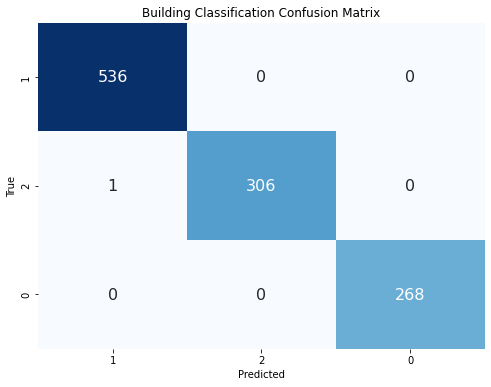

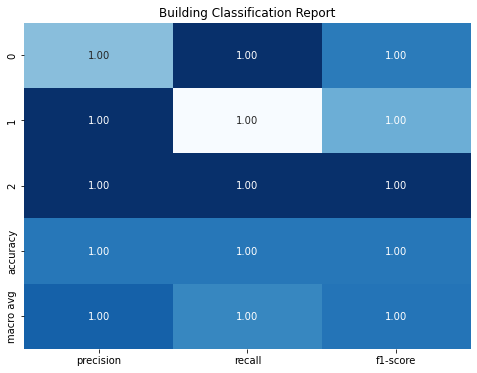

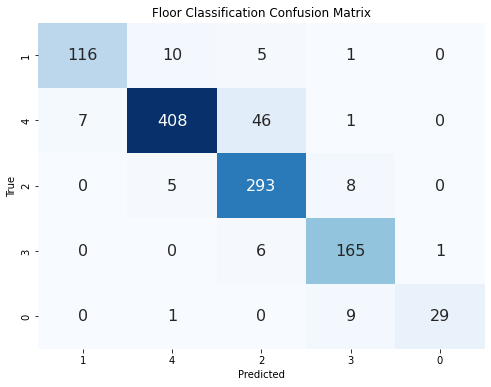

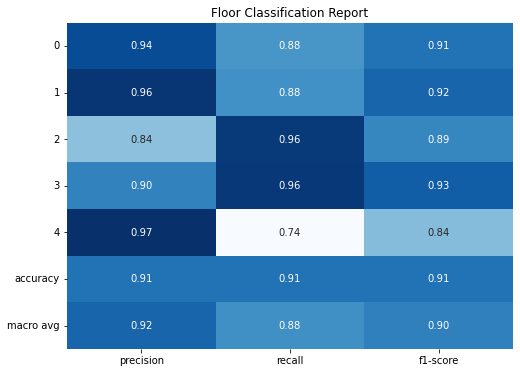

In [28]:
# Confusion Matrix for Building Classification 
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, 
                xticklabels=y_true.unique(), yticklabels=y_true.unique())
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_building_test, y_building_pred, title="Building Classification Confusion Matrix")

# Classification Report for Building Classification
def plot_classification_report(y_true, y_pred, label="Building"):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", cbar=False)
    plt.title(f"{label} Classification Report")
    plt.show()

# Ploting the classification report for Building
plot_classification_report(y_building_test, y_building_pred, label="Building")

# Confusion Matrix for Floor Classification 
plot_confusion_matrix(y_floor_test, y_floor_pred, title="Floor Classification Confusion Matrix")

# Classification Report for Floor classification
plot_classification_report(y_floor_test, y_floor_pred, label="Floor")


**4) Basic Regression Model (Linear Regression)** 

4.1. Importing the model and splitting data

In [44]:
from sklearn.linear_model import LinearRegression

# Define Latitude and Longitude (target variables)
y_lat_train = train_df["LATITUDE"]
y_lat_test = test_df["LATITUDE"]

y_long_train = train_df["LONGITUDE"]
y_long_test = test_df["LONGITUDE"]

4.2. Implementing the basic regression model to predict the coordinates 

In [50]:
# Linear Regression Implementation

# Scaling features
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Scaling the labels (Latitude and Longitude)
lat_scaler = StandardScaler()
long_scaler = StandardScaler()

y_lat_train_scaled = lat_scaler.fit_transform(y_lat_train.values.reshape(-1, 1))
y_long_train_scaled = long_scaler.fit_transform(y_long_train.values.reshape(-1, 1))

# Fitting the models on the scaled data
lat_reg = LinearRegression()
long_reg = LinearRegression()

lat_reg.fit(X_train_scaled, y_lat_train_scaled)
long_reg.fit(X_train_scaled, y_long_train_scaled)


LinearRegression()

4.3. Testing and Evaluating the Regression models

In [53]:
# Predictions
lat_preds_scaled = lat_reg.predict(X_test_scaled)
long_preds_scaled = long_reg.predict(X_test_scaled)

# Inverse transforming predictions to the original scale
lat_preds = lat_scaler.inverse_transform(lat_preds_scaled)
long_preds = long_scaler.inverse_transform(long_preds_scaled) 

# Regression Metrics for Longtitude and Latitude
lat_rmse = mean_squared_error(y_lat_test, lat_preds, squared=False)
lat_mae = mean_absolute_error(y_lat_test, lat_preds)

long_rmse = mean_squared_error(y_long_test, long_preds, squared=False)
long_mae = mean_absolute_error(y_long_test, long_preds)

print("--- LATITUDE REGRESSION METRICS ---")
print("RMSE:", lat_rmse)
print("MAE:", lat_mae)

print("\n--- LONGITUDE REGRESSION METRICS ---")
print("RMSE:", long_rmse)
print("MAE:", long_mae)

--- LATITUDE REGRESSION METRICS ---
RMSE: 163653351.40597212
MAE: 52921441.22566112

--- LONGITUDE REGRESSION METRICS ---
RMSE: 109176045.21970814
MAE: 35304829.487570114


4.4. Visualizing the regression model's predictions in comparisson to true coordinates

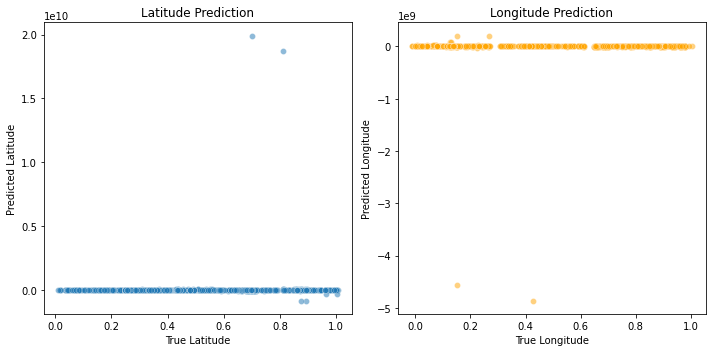

In [54]:
# Visualizing predictions vs. true coordinates
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_lat_test, y=y_lat_pred, alpha=0.5)
plt.xlabel("True Latitude")
plt.ylabel("Predicted Latitude")
plt.title("Latitude Prediction")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_long_test, y=y_long_pred, alpha=0.5, color='orange')
plt.xlabel("True Longitude")
plt.ylabel("Predicted Longitude")
plt.title("Longitude Prediction")
plt.tight_layout()
plt.show()
